# Sorting Algorithms

Sorting is a fundamental operation in many computing system and there are myriad sorting algorithms that vary both in how they work and how they perform.

Let's use use CFiddle to compare several sorting algorthims, implemented in [sorting/sort.cpp](sorting/sort.cpp).

To start, we'll compile `sort.cpp`:

In [1]:
from cfiddle import *
from numpy import arange
import pandas as pd

sort = build("sorting/sort.cpp", build_parameters=dict(OPTIMIZE="-O3"), verbose=True)[0]

['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O3', 'BUILD=.cfiddle/builds/build/OPTIMIZE_-O3_sort', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=sorting:.cfiddle/builds/build/OPTIMIZE_-O3_sort', '.cfiddle/builds/build/OPTIMIZE_-O3_sort/sort.so']
make: '.cfiddle/builds/build/OPTIMIZE_-O3_sort/sort.so' is up to date.



## Bubble Sort

Then we can get started with [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort):

In [2]:
sort.source("bubble_sort")

uint64_t* bubble_sort(uint64_t size)
{
	uint64_t * list = random_array(size);
	start_measurement();
	uint64_t temp;
	for(uint64_t i=0; i<size; i++)
	{
		for(uint64_t j=size-1; j>i; j--)
		{
			if(list[j]<list[j-1])
			{
				temp=list[j-1];
				list[j-1]=list[j];
				list[j]=temp;
			}
		}
	}
	end_measurement();
	CHECK(list);
	return NULL;
}

Bubble sort's complexity is $O(n^2)$, which we can verify by [plotting](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html) it's execution time as a function of $n$:

<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

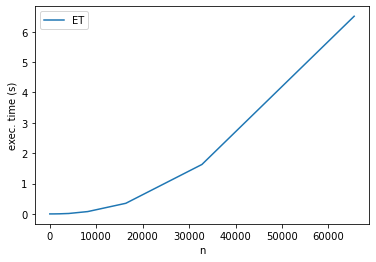

In [3]:
r = run(executable=sort, function="bubble_sort", arguments=arg_map(size=2**arange(4, 17))).as_df()
r.plot.line(x="size", y="ET", xlabel="n", ylabel="exec. time (s)")


## Insertion Sort

[Insertion Sort](https://en.wikipedia.org/wiki/Insertion_sort) is also $O(n^2)$.  Let's compare them!

In [4]:
sort.source("insertion_sort")

uint64_t* insertion_sort(uint64_t size)
{
	uint64_t * list = random_array(size);
	start_measurement();
	for(uint64_t j=1;j<size;j++)
	{
		uint64_t key=list[j];
		uint64_t i = j-1;
		while(list[i] > key)
		{
			list[i+1]=list[i];
			if (i == 0)
				break;
			i=i-1;
		}
		list[i+1]=key;

	}
	end_measurement();
	CHECK(list);
	return NULL;
}

In [5]:
r = run(executable=sort, function=["bubble_sort", "insertion_sort"], arguments=arg_map(size=2**arange(4, 16))).as_df()

This gives a nice table of values:

In [6]:
display(r)

,OPTIMIZE,function,size,ET
0,-O3,bubble_sort,16,0.000007
1,-O3,bubble_sort,32,0.000008
2,-O3,bubble_sort,64,0.000010
3,-O3,bubble_sort,128,0.000046
4,-O3,bubble_sort,256,0.000081
5,-O3,bubble_sort,512,0.000233
6,-O3,bubble_sort,1024,0.000893
7,-O3,bubble_sort,2048,0.002981
8,-O3,bubble_sort,4096,0.014634
9,-O3,bubble_sort,8192,0.074706


But it's not so easy to graph.  Panda's [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) can fix that:

In [7]:
comparison = pd.pivot_table(r, values="ET", columns="function", index="size")
display(comparison)

function,bubble_sort,insertion_sort
size,,
16,0.000007,0.000005
32,0.000008,0.000006
64,0.000010,0.000007
128,0.000046,0.000006
256,0.000081,0.000012
512,0.000233,0.000037
1024,0.000893,0.000140
2048,0.002981,0.000527
4096,0.014634,0.002130


<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

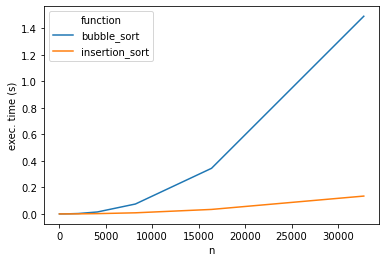

In [8]:
comparison.plot.line(xlabel="n", ylabel="exec. time (s)")

I guess that's why you're not supposed to use bubble sort!

## More Sorts

Let's drop bubble sort because it's terribly slow.

In [9]:
r = run(executable=sort, function=["insertion_sort", 
                         "merge_sort", 
                         "stl_sort", 
                         "quick_sort"
                        ], arguments=arg_map(size=2**arange(4, 16))).as_df()

<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

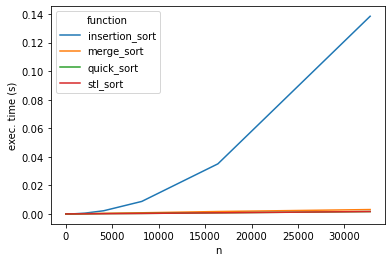

In [10]:
comparison = pd.pivot_table(r, values="ET", columns="function", index="size")
comparison.plot.line(xlabel="n", ylabel="exec. time (s)")

That really drives home the difference between $O(n^2)$ and $O(n \lg n)$.  Here's just the $O(n \lg n)$ algorthims:

That's a little noisy.  Let's look at larger data sizes:

<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

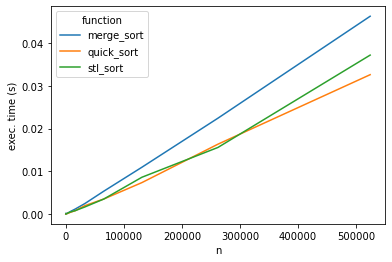

In [11]:
r = run(executable=sort, function=[
                         "merge_sort", 
                         "stl_sort", 
                         "quick_sort"], arguments=arg_map(size=2**arange(4, 20))).as_df()
comparison = pd.pivot_table(r, values="ET", columns="function", index="size")
comparison.plot.line(xlabel="n", ylabel="exec. time (s)")

If the numbers look odd, try re-running it.  Performance variation happens!

# The Impact of The Compiler

We can also examine the impact of the compiler on performance.  Let's see how `std::sort()` performance changes with different optimizations.

In [12]:
sorts = build("sorting/sort.cpp", build_parameters=arg_map(OPTIMIZE=["-O0", "-O1 -fno-inline", "-O1", "-O3"]))
r = run(executable=sorts, function="stl_sort", arguments=arg_map(size=[2**20])).as_df()

,OPTIMIZE,function,size,ET
0,-O0,stl_sort,1048576,0.229615
1,-O1 -fno-inline,stl_sort,1048576,0.143981
2,-O1,stl_sort,1048576,0.070776
3,-O3,stl_sort,1048576,0.071529


<AxesSubplot:xlabel='OPTIMIZE', ylabel='exec. time (s)'>

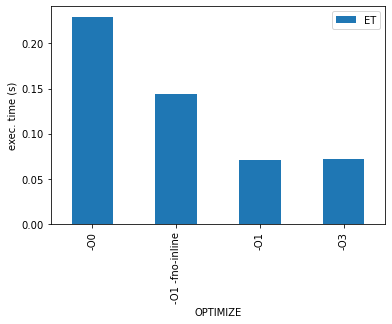

In [13]:
display(r)
comparison = pd.pivot_table(r, values="ET", columns="OPTIMIZE", index="size")
r.plot.bar(y="ET",x="OPTIMIZE", ylabel="exec. time (s)")